# 6.1 - Trans-D sampling in polynomial regression#

<!--<badge>--><a href="https://colab.research.google.com/github/msambridge/InversionPracticals/blob/main/S6.1 - TransD sampling polynomial regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a><!--</badge>-->

*This tutorial is based on material originally developed by Rhys Hawkins.*

In [1]:
# -------------------------------------------------------- #
#                                                          #
#     Uncomment below to set up environment on "colab"     #
#                                                          #
# -------------------------------------------------------- #

# !git clone https://github.com/msambridge/InversionPracticals
# !pip install pybind11
# !apt install swig
# !pip install git+https://github.com/inlab-geo/pyrjmcmc.git
# %cd InversionPracticals

In this practical we look at Transdimensional sampling of a polynomial regression problem. That is sampling over the coefficients of a polynomial with variable order for a given two 2D $(x,y)$ dataset.

Consider the 2-D data set of noisy $(x,y)$ values shown in the Figure below. Lets assume we 
are reasonably certain that a polynomial generated the data but we are uncertain
or its order. The task is
to recover information about the (red) function from the observations. We could perform least squares fitting for each polynomial and use some form of F-test to choose the most apprpriate order. This problem is discussed in Sambridge et al. (2006) who argue similar to previous authors that a more comprehensive solution is given by trans-dimensional Bayesian sampling.

In this practical you will do this without fixing the complexity
(polynomial order) of the curve in advance. Instead the data is used to
constrain the number of degrees of freedom in the curve using
(transdimensional) Bayesian sampling.

<img src="Figures/rjmcmc_single/ch0-exampledata.png" alt="RJMCMC figure" width="400"/>
Test 2-D data set. Red curve is the true function, dots are the observed data.

This practical makes use of Trans-D Bayesian Markov chain Monte Carlo sampling
software. The library is available as Fortran or C source code with a
python interface. 
The tutorial can be used as a guide to carry out the
following exercises with detailed descriptions of what each component does. Here you can either try and write python scripts
yourself to carry out the exercises below, or just load the solutions written in the tutorial,
run them and examine what they do.

The task is to estimate the red curve, as well as its uncertainty using
the Partition Modelling algorithm. This is
implemented in the python software library <span>*rjmcmc*</span>.

Lets load the trans-D python library.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np
from matplotlib import animation, rc
from pyrjmcmc import rjmcmc

For this tutorial we will use a non-trivial (in the sense that it will
require a higher order polynomial to fit the function correctly) synthetic
dataset with added noise.
The function that is used is an exponentially increasing sine wave
over the domain 0 . . . 10, i.e.

$$y = e^{x/3} \sin \frac{2x}{3}$$

Lets assume that the errors are independent and only in the
y-co-ordinate and have a Gaussian distribution, with variance
$\sigma_i^2$. If the data are $y_i, (i=1,\dots, n)$ and the model
predictions at the same locations are $y_i, (i=1,\dots, n)$, then the
Likelihood function which measures the success of the model in fitting
the data is given by

$$p({\bf d} | {\bf m}) = \frac{1}{(2\pi)^{n/2}\prod_{i=1}^n \sigma_i} e ^{-\sum_{i=1}^n [y^{obs}_i - y_i({\bf m})]^2/\sigma_i^2}.$$

**Task 1**.  First load the given data set of $(x^{obs}_i, y^{obs}_i)$ values and
    plot the data. You should see a figure similar to the one above.


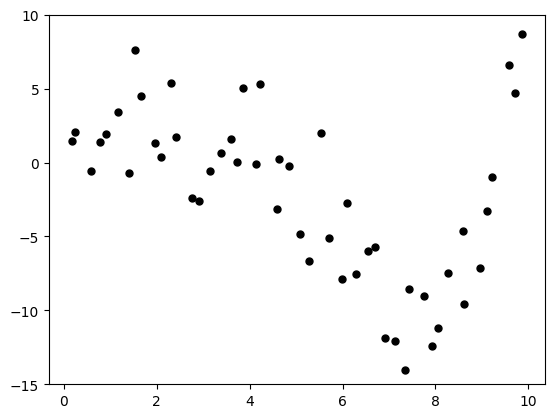

In [2]:
#
# Open our data file which consists of one (x, y) coordinater per line
# separated by whitespace
#
f = open('datasets/rjmcmc_single_data.txt', 'r')
lines = f.readlines()

x = []
y = []

for line in lines:
    columns = line.split()

    x.append(float(columns[0]))
    y.append(float(columns[1]))

f.close()

# plot the data
fig = plt.figure()
plt.plot(x, y, 'ko',markersize=5)
plt.ylim(-15,10)
plt.show()


**Task 2**. In this exercise we assume a polynomial representation for the
    unknown function (red curve) with maximum order 5 and a uniform
    prior PDF.


In this exercise you will need to use routines `data = rjmcmc.dataset1d(x,y,n)` to build the data object, and `results = rjmcmc.regression_single1d(data)` to carry out the analysis and return the results object. The parameters for this
function are as follows with default values shown where applicable:

- **data**: The dataset object to run the analysis on. This is an `rjmcmc.dataset1d` object which wraps the x and y vectors you load
from the file and includes individual point noise values. This is the
only parameter which doesn’t have a default value.
- **burnin** = 10000 The number of initial samples to throw away.
- **total** = 50000 The total number of samples to use for the analysis.
- **max_order** = 5 The maximum order of polynomial to use to fit the
data.
- **xsamples** = 100 The number of points to sample along the x direction
for the curve.
- **ysamples** = 100 The number of points to sample along the y directory
for the statistics such as mode, median and confidence intervals.
This is the number of bins for the histograms in the y direction.
- **confidence_interval** = 0.95 The confidence interval to use for minimum
and maximum confidence intervals. This should be a value
between 0 and 1.


single partition regression analysis 3

For this analysis we are only going to use the default values, which is implemented with `results = rjmcmc.regression_single1d(data)`. Various properties of the results are accessible through the results object, e.g. `results.x`. Use `help(results)' for details.

Use the 1-D Partition modelling software to generate
    50000 curves and take the mean. It should look like the figure below.



<img src="Figures/rjmcmc_single/ch2-analyse.png" alt="RJMCMC figure" width="400"/>
2-D data set with mean reconstructed model from 50000 McMC samples.

In [3]:
#
# Set up error standard deviation
#
sigma = 3.0
n = [sigma] * len(x)

#
# Create the rjmcmc dataset
#
data = rjmcmc.dataset1d(x, y, n)


**Task 3**  
In this example the maximum order of the polynomial has been fixed
    at 5. Adjust the
    maximum order between 0 and 5 and plot the posterior distribution of
    the order. Plot the two figures showing the mean predicted curve
    for each case and the posterior PDF on the order of the
    polynomial, as below. This shows how the data support has detected
    the degree of the polynomial.
    
 <img src="Figures/rjmcmc_single/ch3-orderanalysis.png" alt="RJMCMC figure" width="400"/>
 <img src="Figures/rjmcmc_single/ch3-orderanalysishist.png" alt="RJMCMC figure" width="400"/>
Figure {a) (Upper panel) Mean models for 6 separate McMC runs with different maximum order of polynomial, 0 to 5; b) (Lower panel) Posterior probability distribution showing the support of the data for different polynomial orders as a function of maximum order.   

In [4]:
# run rjmcmc with differing maximum order and plot results



### Confidence Intervals

So far we have only plotted the mean of the fits, however this gives
us no indication of distribution of the fit (this can be thought of as
the confidence of the fit). There are a number of ways in which we can
look at this and one of these is to look at the curves generated
during the analysis.

In this script we call a slightly different function called ** regression_single1d_sampled ** which accepts a callback function. We define this function, which accepts an x and y list which is the discretization of the current 
fitting polynomial being used. In this function we sample every
5th polynomial and store them. 

**Task 4** 
Repeat the run with maximum order 5 to generate an ensemble of
    solutions, just as in exercise 2 above, only this time use the
    library routines to plot a density model of the entire ensemble. In
    this way we get a visual impression of the error in the predicted
    curve. You can use script use script <span>ch4-confidence.py</span>
    to do this and you should get a plot similar to the figure.
    
<img src="Figures/rjmcmc_single/ch4-confidence.png" alt="RJMCMC figure" width="400"/>
Figure  Grayscale image of probability density of all curves in the ensemble when assuming maximum polynomial order equal to 5

In [5]:
#
# This is an example callback function which can be passed to rjmcmc routines to sample the curves generated 
# during the analysis
#
sample_x = None
sample_curves = []
sample_i = 0
sample_rate = 5
def sampler_cb(x, y):
    global sample_x, sample_curves, sample_i, sample_rate

    if sample_i == 0:
        sample_x = x

    if sample_i % sample_rate == 0:
        sample_curves.append(y)

    sample_i = sample_i + 1

In [6]:
#
# Run a series of analyses with varying maximum allowed order
#


The sampled fits are plotted with transparency so that where they
overlap this will show increased density implying that where these
sampled polynomial ensemble appears darker, we can have higher 
confidence that the underlying function passes through that
region.

### Estimating data noise

With the hierarchical Bayesian approach we include the standard deviation
of the noise on the observations as an unknown. In the above examples
the noise $\sigma$ was set to 3 units, but the actual $\sigma$
of the data noise in Figure 1 is 3.5.
Can we use the data to detect the true standard deviation of its noise?
The hierarchical Bayesian sampling scheme is implemented with the following script. Inference on the noise is implemented by 
introducing a new parameter, $\lambda = \frac{\sigma_{est}}{\sigma_{true}}$, 
defined as the ratio of the estimated noise to the real noise.

**Task 5** 
Use the routines to try and estimate
    the standard deviation of the noise in the data. In fact we invert
    for a parameter $\lambda$ which is the ratio of the estimated noise
    (i.e. $\sigma$ in eqn. 10) to the true noise. 
    
For this exercise you will need to set the range and standard deviation of the $\lambda$ values with the routines ** data.set_lambda_range(lambda_min, lambda_max) **, and ** data.set_lambda_std(lambda_std)**, where the data object has been obtained from the setup routine ** data = rjmcmc.dataset1d(x, y, n)**. Then you will need to perform the analysis with  ** results = rjmcmc.regression_single1d(data, pd) **, after which you can obtain various diagnostics using
** results.partition_location_histogram(), results.partitions(), results.proposed(), results.acceptance(), results.lambda_history() **

Plot a histogram of
    the results and see how well the Bayesian sampling is able to
    constrain the level of noise in the data. Your results should be
    similiar to Figure below. If the data were estimated with $\sigma=3$,
    what do you think the true value was ?

<img src="Figures/rjmcmc_single/ch5-hierarchical.png" alt="RJMCMC figure" width="400"/>
Figure  Posterior PDF of the data noise parameter λ values found from sampling.

In [7]:
# set up lambda ranges
lambda_min = 0.5
lambda_max = 2.0
lambda_std = 0.05


In this script we set up a uniform prior on $\lambda$ over a pre-determined range and use
a Gaussian distribution to perturb the $\lambda$ values during the Markov chain.
The range of the values of $\lambda$ as well as the standard deviation of the
perturbation are parameter that must be chosen. 

You should see that the histogram shows the support of the data for a range of $\lambda$ values. 
Clearly there is information in the data on the likely values of noise.
Where is the peak of the histogram? How does this compare to the ratio of the estimated
to true $\sigma$? Usually the ability of the data to constrain noise parameters will trade-off 
with the model complexity given, in this case, by the order of the polynomial.
You can edit the script by changing the estimated noise and rerun to see what happens.